<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="120" /></center>

---
# **Table of Contents**
---
**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  - **4.3** [**Numerical Data Distribution**](#Section43)
  - **4.4** [**Pre Profiling Report**](#Section44)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Identification & Handling of Missing Data**](#Section51)
  - **5.2** [**Identification & Handling of Redundant Data**](#Section52)
  - **5.3** [**Identification & Handling of Inconsistent Data Types**](#Section53)
  - **5.4** [**Post Profiling Report**](#Section54)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
  - **7.1** [**Encoding Categorical Features**](#Section71)
  - **7.2** [**Feature Selection using Random Forest**](#Section72)
  - **7.3** [**Data Preparation**](#Section73)

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Baseline Models**](#Section81)
  - **8.2** [**Essential Features Models**](#Section82)
  - **8.3** [**Model Evaluation Using K-Fold Cross Validation**](#Section83)
  - **8.4** [**Fine Tuning of Model**](#Section84)
  - **8.5** [**Final Model**](#Section85)

**9.** [**Conclusion**](#Section9)<br>

---

<a id = Section1></a>

---
# **1. Introduction**
---
According to <a href = "https://6fefcbb86e61af1b2fc4-c70d8ead6ced550b4d987d7c03fcdd1d.ssl.cf3.rackcdn.com/cms/reports/documents/000/004/072/original/CDP_Supply_Chain_Report_2019.pdf?1550490556">**CDP's Supply Chain Report 2019**</a>, the CDP(Carbon Disclosure Project) **Supply Chain program**
has **continuously grown** its impact **over** the **past
decade**. Since its **launch in 2008 with 14 members**,
the program has **now expanded to** bring together
**115 major** purchasing **organizations around** the
**world**, collectively **representing** **US$3.3 trillion** in
**procurement** **spend**. 

The **lesson** from a decade of the CDP Supply Chain
program **is** that large **public and private sector**
organizations really **can lead effective change**
**through** using **their** substantial **procurement spend** as
a powerful lever for action. **If others** can **follow** their
example, and **suppliers continue to cascade good
practices** and commitments further **down the supply
chain**, **this** can **play** a **huge role in the rapid transition**
**to** a **sustainable, low carbon economy**.

<center><img src = "https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Supply%20Chain%20Management%201.PNG"></center>

So in **summary**, there is **there is direct impact on environment** in supply chain program. Most **companies** begin with the best **intentions** to **achieve successful** and **sustainable supply chain cost** management, but **somehow** seem to **lose** **momentum**, only to **see costs increase** against in **short order**. The **supply chain process** should be **handled** in such a way that there is **minimum impact** on **environment** while **covering maximum profit**. 

**<h4>Note:</h4>** In this case study we will be **ignoring** the **study of environmental factors** because **most** of the **companies don't disclose** their **reports** on environmental impacts and only **focusing** on the **profit accquirement**.

<a id = Section2></a>

---
# **2. Problem Statement**
---

Supply Chain **initiates** from gathering **raw materials**, **supplying** raw materials by supplier to the **manufacturing**, **delivering** to **retailers** by the **distributer**. Finally these products are **consumed** by the **consumer**. With the **increase** in **demand** this **process** **repeats** over again.

<center><img src = "https://cdn.corporatefinanceinstitute.com/assets/Supply-Chain-Example.png"></center>

**<h3>Scenario:</h3>**

**DataCo** an **IT** service management **company**, **used** this **data** to **analyse** the **supply chain** in **areas** of **important** registered **activities** which includes **Provisioning** , **Production** , **Sales** and **Commercial Distribution**. But due to their **traditional processing** methodolgy, they are **unable** to **capture** the **true picture** of their data. They **want** to **identify growth opportunities** related to a given industry within a region. 

They **hired** a **team** of **data scientists** to **analyse and build an automated solution** which can **help** in **identifying key patterns** out of their data **leading growth** of their **company**.

**Note:** Here we will be involved only between Retailer, Consumer & Supplier.



| Target Feature | Potential Values |
| :-- | :-- |
|**Benefit per order**|Range: [ -4274.97, 911.7 ]|

<a id = Section3></a>

---
# **3. Installing & Importing Libraries**
---

<a id = Section31></a>
### **3.1 Installing Libraries**

In [0]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Toolbox for Generating Statistics Report
!pip install -q yellowbrick                   # Toolbox for Measuring Machine Performance
!pip install -q imbalanced-learn              # Toolbox for Imbalanced Dataset
!pip install -q category-encoders             # Transformers Toolbox to Encode Categorical Variables as Numeric

<a id = Section32></a>
### **3.2 Upgrading Libraries**

**Note:** After upgrading, you need to restart the runtime. Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [0]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

<a id = Section33></a>
### **3.3 Importing Libraries**

In [1]:
# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
import pandas.util.testing as tm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

# For Numerical Python
import numpy as np

# For Random seed values
from random import randint

# For Scientifc Python
from scipy import stats

# For datetime
from datetime import datetime as dt

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.offline import plot

# For Preprocessing
from sklearn.preprocessing import StandardScaler

# For Encoding Categorical Features
from category_encoders import TargetEncoder

# For Feature Selection
from sklearn.feature_selection import SelectFromModel

# For Feature Importances
from yellowbrick.model_selection import FeatureImportances

# For metrics evaluation
from sklearn.metrics import mean_squared_error, r2_score

# For Data Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



<a id=Section4></a>

---
# **4. Data Acquisition & Description**
---

This data set is based on supply chain management provided by DataCo Global and is accessible <a href="https://storage.googleapis.com/retail-analytics-data/DataCoSupplyChainDataset.csv">**here**</a>.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 180519 | 53 | 91.4 MB|

|Id|Features|Description|
| :-- | :-- | :-- |
|01|**Type**|Type of tranasaction made.|
|02|**Days for shipping (real)**|Actual shipping days of the purchased product.|
|03|**Days for shipment (scheduled)**|Days of scheduled delivery of the purchased product.|
|04|**Benefit per order**|Earnings per order placed.|
|05|**Sales per customer**|Total sales made per customer. Generally gives you an idea about how much a customer is spening.|
|06|**Delivery Status**|Delivery status of orders: [Advance shipping , Late delivery , Shipping canceled , Shipping on time].|
|07|**Late_delivery_risk**|Categorical variable that indicates if sending is late (1), it is not late (0).|
|08|**Category Id**|Product category code.|
|09|**Category Name**|Description of the product category.|
|10|**Customer City**|City where the customer made the purchase.|
|11|**Customer Country**|Country where the customer made the purchase.
|12|**Customer Email**|Customer's email.|
|13|**Customer Fname**|Customer's first name.|
|14|**Customer Id**|Customer unique ID.|
|15|**Customer Lname**|Customer's last name.|
|16|**Customer Password**|Masked customer key.|
|17|**Customer Segment**|Types of Customers: [Consumer , Corporate , Home Office.]|
|18|**Customer State**|State to which the store where the purchase is registered belongs.|
|19|**Customer Street**|Street to which the store where the purchase is registered belongs.|
|20|**Customer Zipcode**|Customer zipcode.|
|21|**Department Id**|Department code of store.|
|22|**Department Name**|Department name of store.|
|23|**Latitude**|Latitude corresponding to location of store.|
|24|**Longitude**|Longitude corresponding to location of store.|
|25|**Market**|Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA.|
|26|**Order City**|Destination city of the order.|
|27|**Order Country**|Destination country of the order.|
|28|**Order Customer Id**|Customer order code.|
|29|**order date (DateOrders)**|Date on which the order is made.|
|30|**Order Id**|Order code.|
|31|**Order Item Cardprod Id**|Product code generated through the RFID reader.|
|32|**Order Item Discount**|Order item discount value.|
|33|**Order Item Discount Rate**|Order item discount percentage.|
|34|**Order Item Id**|Order item code.|
|35|**Order Item Product Price**|Price of products without discount.|
|36|**Order Item Profit Ratio**|Order Item Profit Ratio.|
|37|**Order Item Quantity**|Order Item Quantity.|
|38|**Sales**|Value in sales(selling price).|
|39|**Order Item Total**|Total amount per order.|
|40|**Order Profit Per Order**|Order Profit Per Order.|
|41|**Order Region**|Region of the world where the order is delivered :  [Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, |
|||Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa ,|
||| Central Asia ,  Europe , Central America, Eastern Europe , South of  USA.]|
|42|**Order State**|State of the region where the order is delivered.|
|43|**Order Status**|Order Status : [COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW.]|
|44|**Order Zipcode**|Zipcode of the region where the order is delivered.|
|45|**Product Card Id**|Product code.|
|46|**Product Category Id**|Product category code.|
|47|**Product Description**|Product Description.|
|48|**Product Image**|Link of visit and purchase of the product (Masked).|
|49|**Product Name**|Product Name.|
|50|**Product Price**|Product Price.|
|51|**Product Status**|Status of the product stock :[If it is 1 not available , 0 the product is available.]|
|52|**Shipping date (DateOrders)**|Exact date and time of shipment.|
|53|**Shipping Mode**|The following shipping modes are presented : [Standard Class , First Class , Second Class , Same Day].|



In [0]:
LINK = 'https://storage.googleapis.com/retail-analytics-data/DataCoSupplyChainDataset.csv'

def load_supply_data(link = LINK):
  return pd.read_csv(filepath_or_buffer = link, encoding = 'latin1')

In [3]:
data = load_supply_data()
print('Data Shape:', data.shape)
data.head()

Data Shape: (180519, 53)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


<a id = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [0]:
print('Described Column Length:', len(data.describe().columns))
data.describe()

Described Column Length: 29


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


**Observation:**

- On **average** it takes **more than 3 days** for **shipping** the **product**.
- It took **atmost two days** to **ship 25% of orders** while **50% of orders took 3 days** and **75% of orders atmost 5 days**.
- On **average** it **takes around 3 days to ship** the **product** on **schedule**.
- For **25% of products**, it **took atmost two days** to **schedule** for shipment while for **more than 25%** it **took atmost 4 days**.
- On **average** the **earning per order** placed is **~$\$$22 dollars**.
- For **25% of products**, **earning per order is $\$$7 dollars** while for **50% and 75% of products**, it is **$\$$31 dollars and $\$$64 dollars**.
- On **average** a **customer** is **spending** about **$\$$183 dollars**.
- **25% of customers** are **spending $\$$104 dollars**, while **50% and 75% are spending $\$$163 dollars and $\$$247 dollars**.
- **25% of orders** were **not late** while **above that they were late**.
- On average around $\$$20 dollars discount was available on products.
- For **25% of products**, the **discount value was $\$$5 dollars** while for **50% and 75% it was $\$$14 dollars and $\$$30 dollars**.
- On **average** **10% discount was aviailable** on **each product**.
- For **25% of products**, **discount rate was 4%** while for **50% and 75% of products it was 10% and 16%**.
- **25% of ordered products** are in **range<= $\$$50 dollars** while **50% and 75% of products are $\$$60 and $\$$200 dollars**.
- On **average** **12% of profit** is **achieved** on **ordered products**.
- For **25% of products order item profit ratio is 8%** while for **50% and 75% of items profilt ratio is 27% and 36%**.
- **50% of ordered product items** were **unit** while **greater than 50 it was 3**.
- On **average sales** of ordered **item** was around **$\$$203 dollars**.
- **25% of products** ordered were **sold at $\$$120 dollars**, while **50% and 75% of products had selling price of $\$$200 dollars and $\$$300 dollars**.
- On **average total amount of ordered item was $\$$183 dollars**.
- **25% of total amount** to pay on **ordered item was $\$$104 dollars** while for **50% and 75% it was $\$$164 dollars and $\$$247 dollars**.
- On **average order profit per order was $\$$21.97 dollars**.
- **25% of orders have profit per order of $\$$7 dollars** while for **50% and 75% it was $\$$31 dollars and $\$$65 dollars**.

<a id = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

**Observation:**

- **Feature:** 
  - Problem &rarr; Action Required
- **Customer Lname:** 
  - Missing Information(8 Records) &rarr; Drop Records
- **Customer Zipcode:** 
  - Missing Information(3 Records) &rarr; Drop Records 
  - Incorrect Data Type &rarr; Integer Transformation
- **order date (DateOrders):** 
  - Incorrect Data Type &rarr; Datetime Transformation
- **Order Zipcode:** 
  - Missing Information(155679 Records) &rarr; Drop Feature 
  - Incorrect Data Type &rarr; Integer Transformation
- **Product Description:** 
  - Missing Information(180519 Records) &rarr; Drop Feature
- **shipping date (DateOrders):** 
  - Incorrect Data Type &rarr; Datetime Transformation

<a id = Section43></a>
### **4.3 Numerical Data Distribution:**

- We shall plot all **numerical features to analyze the distribution** of their past.
- But **before** that we must **extract** all the **numerical** **features** which has been **performed** **below**.

In [0]:
num_feature = []

for i in data.columns.values:
  if ((data[i].dtype == int) | (data[i].dtype == float)):
    num_feature.append(i)
    
print('Total Numerical Features:', len(num_feature))
print('Features:', num_feature)

Total Numerical Features: 29
Features: ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Price', 'Product Status']


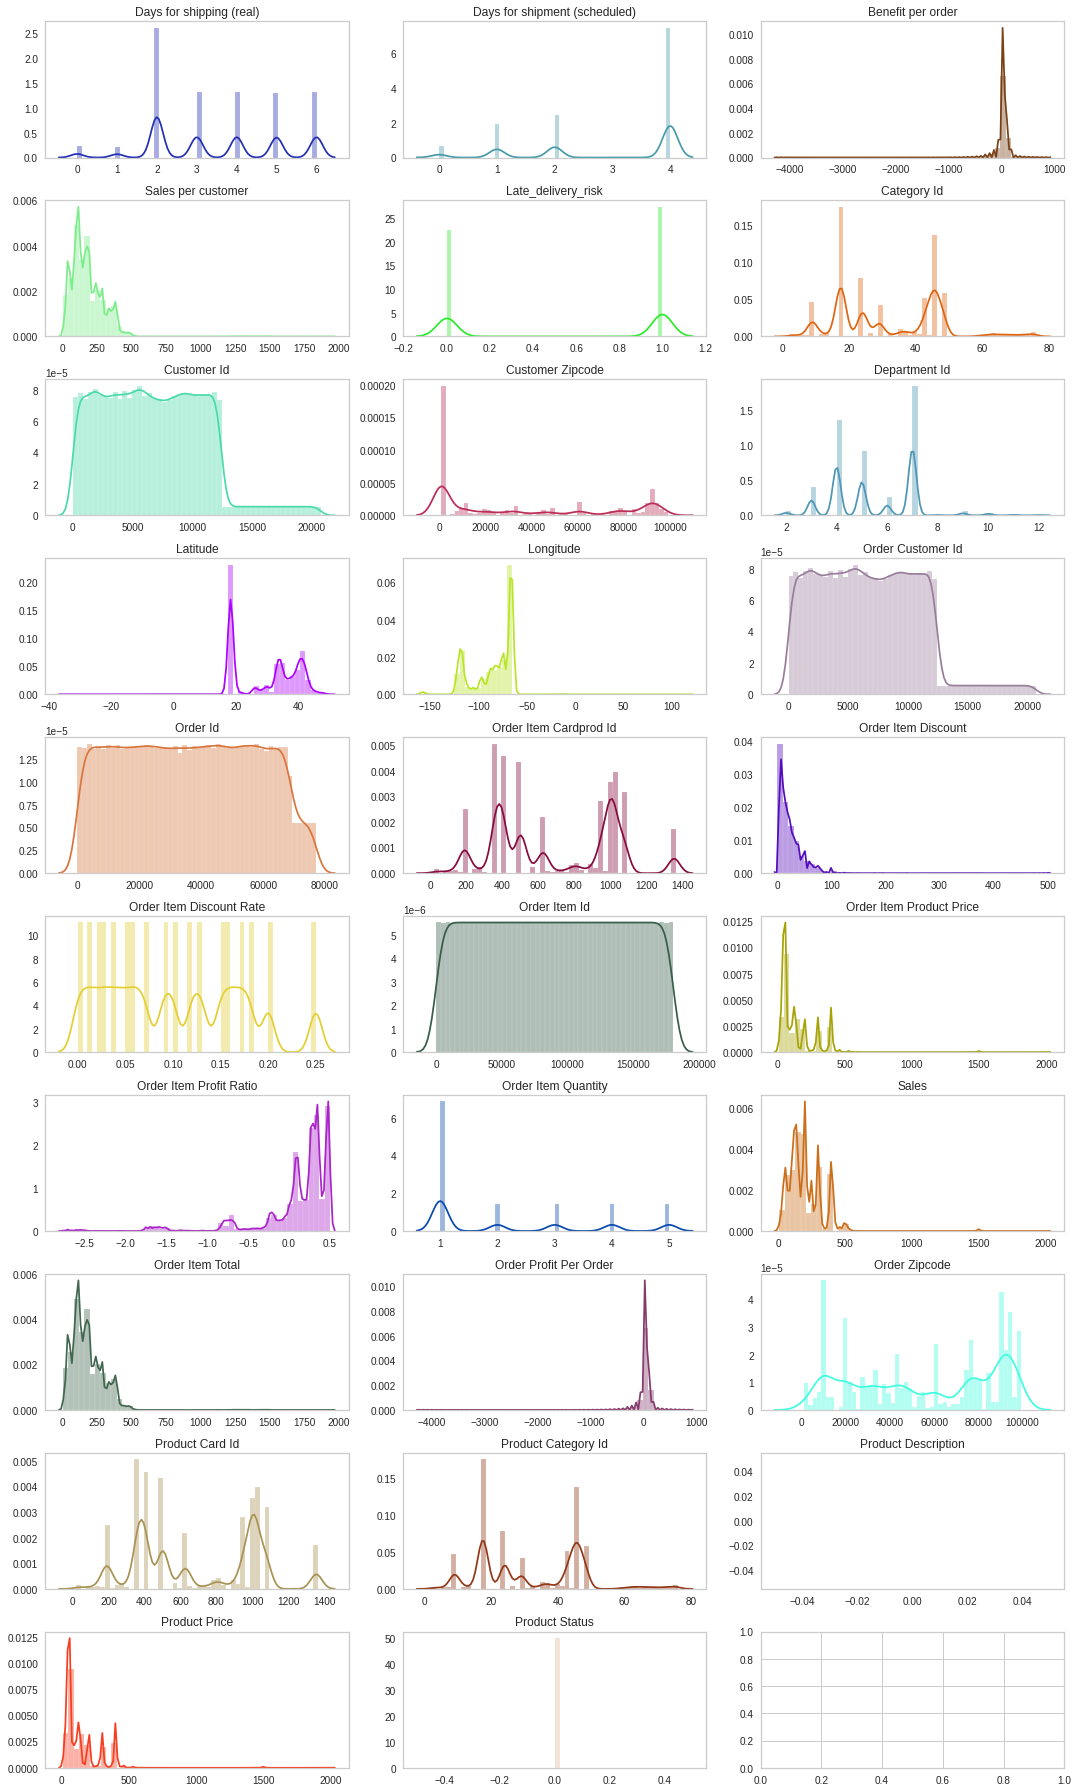

In [0]:
# Creating subplots
fig, axes = plt.subplots(nrows = 10, ncols = 3, sharex = False, figsize=(15, 25))

# Generating random colors based on number of columns
colors = []
for i in range(len(num_feature)):
  colors.append('#%06X' % randint(0, 0xFFFFFF))   
                
for ax, col, color in zip(axes.flat, num_feature, colors):
  sns.distplot(a = data[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, xlabel = '')
  ax.grid(False)
plt.tight_layout()
plt.show()

**Observation:**

- **Positively Skewed Features (Mean > Median > Mode):**
  - Days for shipping (real)
  - Sales per customer
  - Order Item Discount
  - Order Item Product Price
  - Order Item Quantity
  - Sales
  - Order Item Total
  - Product Price
- **Negatively Skewed Features (Mean < Median < Mode):**
  - Days for shipping (scheduled)
  - Benifit per order
  - Late_delivery_risk
  - Latitude
  - Longitude
  - Order Item Profit Ratio
  - Order Profit Per Order
- **Normally Distributed Features (Mean = Median = Mode):**
  - Order Item Discount Rate
  - Product Status

<a id = Section44></a>
### **4.4 Pre Profiling Report**

- For quick analysis pandas profiling is very handy.
- Generates profile reports from a pandas DataFrame.
- For each column statistics are presented in an interactive HTML report.

In [0]:
#profile = ProfileReport(df = data)
#profile.to_file(output_file = 'Pre Profiling Report.html')
#print('Accomplished!')
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

**Observation:**

- Report shows that there are **25 numeric**, **24 categorical**, **2 boolean, 1 url** and **1 variable of unsupported data type**.
- Around **3.5 % of the cells have missing values**.
- **Delivery Status** has **4 distinct values**.
- **Category Name** has very **high cardinality** with **50 distinct values**.
- **Customer City** has very **high cardinality** with **563 distinct values**.
- **Customer State** has very **high cardinality** with **46 distinct values**.
- There are **5 distinct values** in the **Market feature**.
- The **mean, minimum and maximum Sales is $\$$203.77 dollars, $\$$9.98 dollars and $\$$1999.98 dollars** respectively.
- The **mean Order Profit Per Order is $\$$21.97 dollars**.
- There are **9 distinct values** in **Order Status**.
- **Product Name** has **high cardinality** with **118 distinct values**.
- The **mean, minimum and maximum of Product Price is $\$$141.23 dollars, $\$$9.98 dollars and $\$$1999.98 dollars** respectively.
- **5.6%** of the **values in Order Item Discount are 0**.
- **Order Zipcode** has **86.2% missing values**.

<a id = Section5></a>

---
# **5. Data Pre-Processing**
---

<a id = Section51></a>
### **5.1 Identification & Handling of Missing Data**

#### **5.1.1 Null Data Identification & Handling**

**Before Handling Null Data**


In [4]:
null_frame = pd.DataFrame(index = data.columns.values)
null_frame['Null Frequency'] = data.isnull().sum().values
percent = data.isnull().sum().values/data.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155679.00,0.0,0.0,180519.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.24,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**

- **Feature:** 
  - Problem &rarr; Action Required
- **Customer Lname:** 
  - Missing Information(8 Records) &rarr; Drop Records
- **Customer Zipcode:**
  - Missing Information(3 Records) &rarr; Drop Records
- **Order Zipcode:** 
  - Missing Information(155679 Records) &rarr; Drop Feature
- **Product Description:** 
  - Missing Information(180519 Records) &rarr; Drop Feature


**Performing Operations**

In [5]:
print('Data Shape [Before]:', data.shape)
data.dropna(axis = 0, subset = ['Customer Lname', 'Customer Zipcode'], inplace = True)
data.drop(labels = ['Order Zipcode', 'Product Description'], axis = 1, inplace = True)
print('Data Shape [After]:', data.shape)

Data Shape [Before]: (180519, 53)
Data Shape [After]: (180508, 51)


**After Handling Null Data**

- Now that we have performed the operations, let's verify whether the null data has been eliminated or not.

In [6]:
null_frame = pd.DataFrame(index = data.columns.values)
null_frame['Null Frequency'] = data.isnull().sum().values
percent = data.isnull().sum().values/data.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**

- We can see that we have **eliminated null data successfully**.

#### **5.1.2 Zero Data Identification & Handling**

In [7]:
zero_frame = pd.DataFrame(index = data.columns.values)
zero_frame['Null Frequency'] = data[data == 0].count().values
percent = data[data == 0].count().values / data.shape[0]
zero_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
zero_frame.transpose()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
Null Frequency,0.0,5080.00,9737.00,1177.00,0.0,0.0,81536.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10028.00,10028.00,0.0,0.0,1177.00,0.0,0.0,0.0,1177.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180508.0,0.0,0.0
Missing %age,0.0,2.81,5.39,0.65,0.0,0.0,45.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.56,5.56,0.0,0.0,0.65,0.0,0.0,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0


**Observation:**

- **Feature:** 
  - Problem &rarr; Action Required {Reason}
- **Days for shipping (real):**
  - Identified 5080 Zeros &rarr; None {It is ordinal data.}
- **Days for shipment (scheduled):**
  - Identified 9737 Zeros &rarr; None {It is ordinal data.}
- **Benefit per order:** 
  - Identifed 1177 Zeros &rarr; None {Benifit can be 0 in amount.}
- **Late_delivery_risk:** 
  - Identified 81536 Zeros &rarr; None {It is ordinal data.}
- **Order Item Discount:** 
  - Identifed 10028 Zeros &rarr; None {Discount amount can be zero on certain items.}
- **Order Item Discount Rate:** 
  - Identified 10028 Zeros &rarr; None {Discount rate can be zero on certain items.}
- **Order Item Profit Ratio:**
  - Identified 1177 Zeros &rarr; None {Profite ratio can be zero for ordered items.}
- **Order Profit Per Order:** 
  - Identified 1177 Zeros &rarr; None {Profit per order can be zero.}
- **Product Status:**
  - Identified 180508 Zeros &rarr; None {It is ordinal data.}

<a id = Section52></a>
### **5.2 Identification & Handling of Redundant Data**

- In this section **we will identify redundant rows and columns** in our data if present.
- **Before** we will **make a copy of our data** and **drop** some **features** which **uniquely identify** our data points (Id Features). 
- We will **analyze** the **effect** on this **copy of data** and **later down**, all the **changes** will be **introduced** in the **original data**.
 

In [8]:
id_list = []
for i in data.columns.values:
  if 'Id' in i:
    id_list.append(i)
print('Total Length:', len(id_list))
print(id_list)

Total Length: 9
['Category Id', 'Customer Id', 'Department Id', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Id', 'Product Card Id', 'Product Category Id']


In [9]:
data_copy = data.copy()
data_copy.drop(id_list, axis = 1, inplace = True)
print('Copy Data Shape:', data_copy.shape)

Copy Data Shape: (180508, 42)


#### **5.2.1 Identfication & Handling of Redundant Records**

In [10]:
print('Contains Redundant Records?:', data_copy.duplicated().any())

Contains Redundant Records?: False


**Observation:**

- It turns out that there are **no redundant records present** in our data.

#### **5.2.2 Identfication & Handling of Redundant Features**

- For handling duplicate features we have created a custom function to identify duplicacy in features with different name but similar values below.

In [0]:
def duplicate_cols(dataframe):
  ls1 = []
  ls2 = []

  columns = dataframe.columns.values
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if (np.where(dataframe[columns[i]] == dataframe[columns[j]], True, False).all() == True):
        ls1.append(columns[i])
        ls2.append(columns[j])

  if ((len(ls1) == 0) & (len(ls2) == 0)):
    return None
  else:
    duplicate_frame = pd.DataFrame()
    duplicate_frame['Feature 1'] = ls1
    duplicate_frame['Feature 2'] = ls2
    return duplicate_frame

**Before Handling Redundant Columns**

In [12]:
duplicate_cols(data_copy)

,Feature 1,Feature 2
0,Benefit per order,Order Profit Per Order
1,Sales per customer,Order Item Total
2,Customer Email,Customer Password
3,Order Item Product Price,Product Price


**Observation:**

- We can see that **Feature 1** and **Feature 2** are **explaining** the **same thing** so we can **get rid** of **one side** of **features**.
- We dropped following features with reason:
  - **Feature : Reason**
  - Order Profit Per Order : Explaining same as Benifit per order.
  - Order Item Total : Explaining same as Sales per customer.
  - Product Price : Explaining same as Order Item Product Price.
  - Customer Email & Customer Password : Both are masked and have same length value.


**Performing Operations**

In [13]:
data_copy.drop(labels = ['Order Profit Per Order', 'Order Item Total', 'Customer Email', 'Customer Password', 'Product Price'], axis =1, inplace = True)
print('Data Copy Shape:', data_copy.shape)

Data Copy Shape: (180508, 37)


**After Handling Redundant Features**

In [14]:
print(duplicate_cols(data_copy))

None


**Applying Above Operations on Original Data**

In [15]:
complete_list = id_list + ['Order Profit Per Order', 'Order Item Total', 'Customer Email', 'Customer Password', 'Product Price']
data.drop(labels = complete_list, axis =1, inplace = True)
print('Data Shape:', data.shape)

Data Shape: (180508, 37)


<a id = Section53></a>
### **5.3 Identification & Handling of Inconsistent Data Types**

**Before changes: Respective Data Type per Feature**

In [16]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Fname,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Image,Product Name,Product Status,shipping date (DateOrders),Shipping Mode
Type,object,int64,int64,float64,float64,object,int64,object,object,object,object,object,object,object,object,float64,object,float64,float64,object,object,object,object,float64,float64,float64,float64,int64,float64,object,object,object,object,object,int64,object,object


**Observation:**

- **Inconsistent Feature:** 
  - Actual Type &rarr; Desired Type
- **Customer Zipcode:**
  - Float &rarr; Integer
- **order date (DateOrders):**
  - Object &rarr; Datetime
- **shipping date (DateOrders):**
  - Object &rarr; Datetime

**Performing Operations**

In [0]:
data['Customer Zipcode'] = data['Customer Zipcode'].astype(int)

# Removing Time Factor (Example: 2018-01-31 22:00 --> 2018-01-31)
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)']).apply(dt.date)
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)']).apply(dt.date)

# Transforming Object Type to Datetime
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'])

**After changes: Respective Data Type per Feature**

In [18]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Fname,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Image,Product Name,Product Status,shipping date (DateOrders),Shipping Mode
Type,object,int64,int64,float64,float64,object,int64,object,object,object,object,object,object,object,object,int64,object,float64,float64,object,object,object,datetime64[ns],float64,float64,float64,float64,int64,float64,object,object,object,object,object,int64,datetime64[ns],object


<a id = Section54></a>
### **5.4 Post Profiling Report**

- In post profiling, we identify the changes over cleansed data.

In [0]:
#profile = ProfileReport(df = data)
#profile.to_file(output_file = 'Post Profiling Report.html')
#print('Accomplished!')
#from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
#files.download('Post Profiling Report.html')     # Use only if you are using Google Colab, otherwise remove it

**Observation:**

- Report shows that there are **total 38 variables** out of which **20 are categorical**, **13 are numerical**, **2 are boolean**, **2 are date** and **1 is url type**.
- **Order Item Product Price** is **highly right skewed**.
- **Sales** is **highly right skewed**.
- **Order Item Profit Ratio** and **Benefit per order are highly correlated**.

<a id = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**<h4>Question 1: What is the frequency and proportion of scheduled shipment days of order?</h4>**

In [0]:
schedule_shipment = pd.DataFrame(data = data['Days for shipment (scheduled)'].value_counts())
schedule_shipment.reset_index(inplace = True)
schedule_shipment.columns = ['Days for shipment (scheduled)', 'Frequency']
schedule_shipment.set_index('Days for shipment (scheduled)', inplace = True)
schedule_shipment.transpose()

Days for shipment (scheduled),4,2,1,0
Frequency,107745,35214,27812,9737


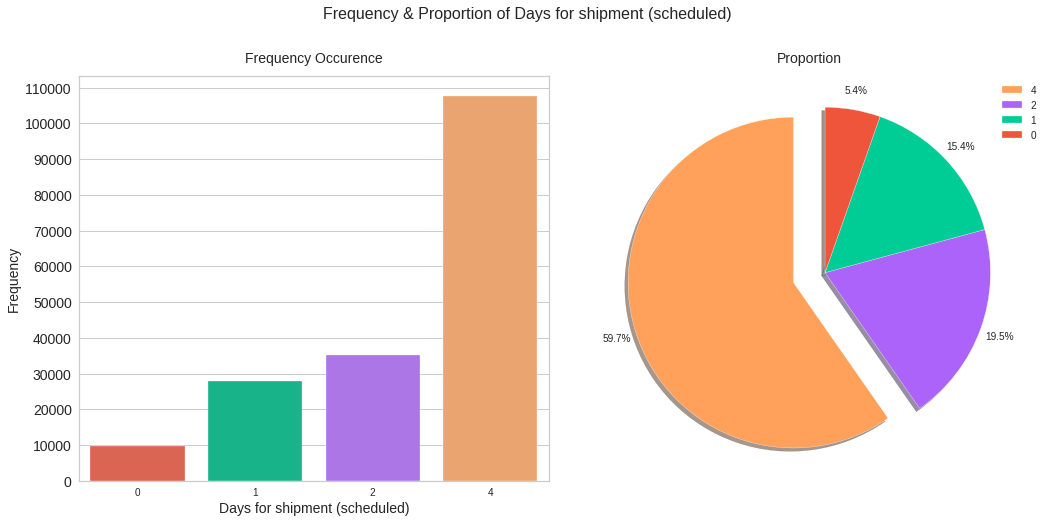

In [0]:
# Creating Figure Instance
figure = plt.figure(figsize = [15, 7])

colors_list1 = ['#EF553B', '#00CC96', '#AB63FA', '#FFA15A']
colors_list2 = ['#FFA15A', '#AB63FA', '#00CC96', '#EF553B']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
ax = sns.barplot(data['Days for shipment (scheduled)'].value_counts().index, data['Days for shipment (scheduled)'].value_counts(), palette  = colors_list1)
plt.yticks(range(0, 120000, 10000), size = 14)
plt.xlabel('Days for shipment (scheduled)', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frequency Occurence', y=1.02, size = 14)

# Plotting Plot 2 i.e. Pie Plot
explode_list = [0.2, 0 , 0, 0]

plt.subplot(1, 2, 2)
data['Days for shipment (scheduled)'].value_counts().plot(kind = 'pie', figsize = [15, 7], autopct = '%1.1f%%', startangle = 90, 
                                     shadow = True, labels = None, pctdistance = 1.12, colors = colors_list2, 
                                     explode = explode_list)
plt.title('Proportion', y = 1.02, size = 14)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = data['Days for shipment (scheduled)'].value_counts().index, loc = 'upper right', frameon = False)
plt.suptitle(t = 'Frequency & Proportion of Days for shipment (scheduled)', y = 1.05, size = 16)
plt.tight_layout(pad = 2.0)
plt.show()

**Observation:**

- **~ 60%** of the **orders** have **scheduled shipment** of **4 days**, while **19% of orders** have **2 days**, **15.5%** have **1 day** and **5.4% have zero days**.

**<h4>Question 2: What is the frequency and proportion of real shipment days of order?</h4>**

In [0]:
schedule_shipment = pd.DataFrame(data = data['Days for shipping (real)'].value_counts())
schedule_shipment.reset_index(inplace = True)
schedule_shipment.columns = ['Days for shipping (real)', 'Frequency']
schedule_shipment.set_index('Days for shipping (real)', inplace = True)
schedule_shipment.transpose()

Days for shipping (real),2,3,6,4,5,0,1
Frequency,56613,28764,28723,28510,28161,5080,4657


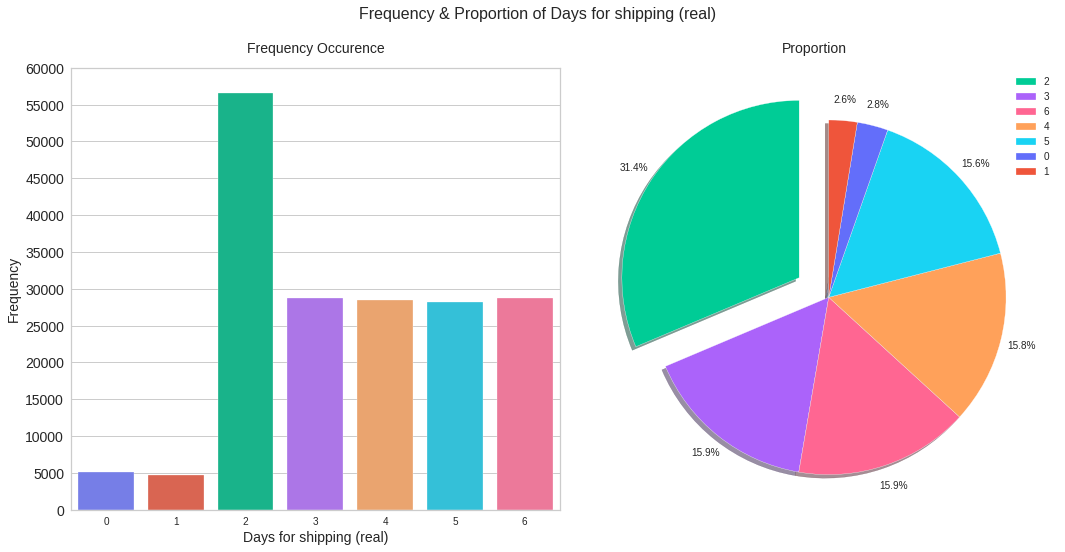

In [0]:
# Creating Figure Instance
figure = plt.figure(figsize = [15, 7.25])

colors_list1 = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692']
colors_list2 = ['#00CC96', '#AB63FA', '#FF6692', '#FFA15A', '#19D3F3', '#636EFA', '#EF553B']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x = data['Days for shipping (real)'].value_counts().index, y = data['Days for shipping (real)'].value_counts(), palette  = colors_list1)
plt.yticks(range(0, 65000, 5000), size = 14)
plt.xlabel('Days for shipping (real)', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frequency Occurence', y=1.02, size = 14)

# Plotting Plot 2 i.e. Pie Plot
explode_list = [0.2, 0 , 0, 0, 0, 0, 0]

plt.subplot(1, 2, 2)
data['Days for shipping (real)'].value_counts().plot(kind = 'pie', figsize = [15, 7.25], autopct = '%1.1f%%', startangle = 90, 
                                     shadow = True, labels = None, pctdistance = 1.12, colors = colors_list2, 
                                     explode = explode_list)
plt.title('Proportion', y = 1.02, size = 14)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = data['Days for shipping (real)'].value_counts().index, loc = 'upper right', frameon = False)
plt.suptitle(t = 'Frequency & Proportion of Days for shipping (real)', y = 1.05, size = 16)
plt.tight_layout(pad = 1.0)
plt.show()

**Observation:**

- **~31% of orders took 2 days** to be shipped while **~16% of orders took 3 or 6 days** to be shipped.
- **~15.8% of orders took 4 days** while **~15.6% of orders took 5 days**.
- **~2.6% of orders took 1 day** to be shipped while **~2.8% of orders took zero days** to be shipped.

**<h4>Question 3: Where is the majority of markets located from where product is set to sail?</h4>**

In [0]:
center_lat = (data['Latitude'].min() + data['Latitude'].max()) / 2
center_lon = (data['Longitude'].min() + data['Longitude'].max()) / 2

fig = px.scatter_mapbox(data_frame = data, lat = 'Latitude', lon = 'Longitude', hover_name = 'Department Name', hover_data=['Benefit per order'],
                        color_discrete_sequence = ['#EF553B'], zoom = 1.5, height = 500, center = dict(lat = center_lat, lon = center_lon))

fig.update_layout(
    mapbox_style = 'white-bg',
    mapbox_layers=[
        {
            'below' : 'traces',
            'sourcetype' : 'raster',
            'source' : ['https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}']
        },
        {
            'sourcetype' : 'raster',
            'source' : ['https://geo.weather.gc.ca/geomet/?SERVICE=WMS&VERSION=1.3.0&REQUEST=GetMap&BBOX={bbox-epsg-3857}&CRS=EPSG:3857'
                       '&WIDTH=1000&HEIGHT=1000&LAYERS=RADAR_1KM_RDBR&TILED=true&FORMAT=image/png'],
        }
      ])
fig.update_layout(margin = {'r' : 0, 't' : 0, 'l' : 0, 'b' : 0})

# Saving Figure
plot(figure_or_data = fig, filename = 'SellerMap', auto_open = False, image_width = 1280, image_height = 600, image = 'png')
fig.show()

**Observation:**

- We can see that **most of the market stores** are **located** at **United States**.

**<h4>Question 4: What is the relationship between Customer Segement and Delivery Status?</h4>**

In [0]:
cust_seg_frame = pd.DataFrame(data = data.groupby(by = ['Customer Segment', 'Delivery Status']).size(), columns = ['Frequency'])
cust_seg_frame.transpose()

Customer Segment         Consumer                                  \
Delivery Status  Advance shipping Late delivery Shipping canceled   
Frequency         21387            51247         4084               

Customer Segment                         Corporate                \
Delivery Status  Shipping on time Advance shipping Late delivery   
Frequency         16783            12855            29979          

Customer Segment                                         Home Office  \
Delivery Status  Shipping canceled Shipping on time Advance shipping   
Frequency         2261              9689             7347              

Customer Segment                                                   
Delivery Status  Late delivery Shipping canceled Shipping on time  
Frequency         17746         1409              5721

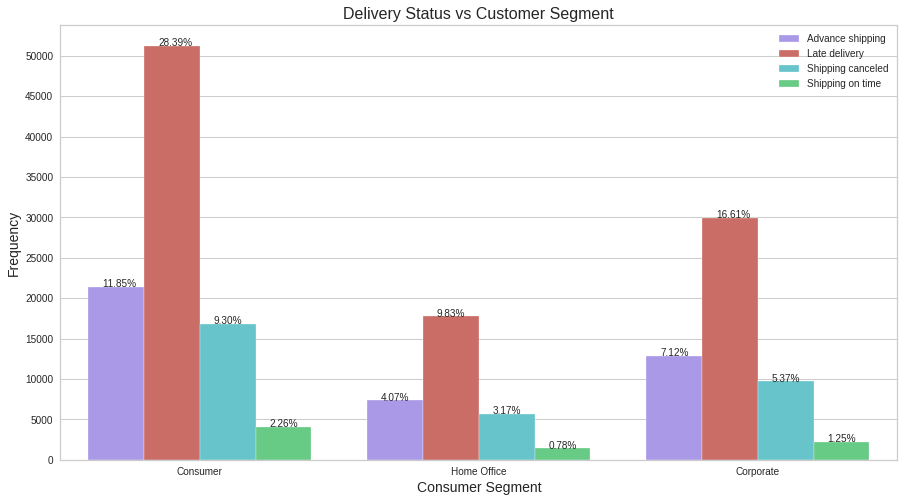

In [0]:
figure = plt.figure(figsize = [15, 8])

ax = sns.countplot(x = 'Customer Segment',  data = data, hue = 'Delivery Status', palette = ['#A38CF4', '#DB5E56', '#56D3DB', '#56DB7F'])

total = data.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height() / total)
  x = p.get_x() + p.get_width() / 4
  y = p.get_y() + p.get_height()
  ax.annotate(s = percentage, xy = (x, y))

plt.yticks(range(0, 55000, 5000))
plt.xlabel('Consumer Segment', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['Advance shipping', 'Late delivery', 'Shipping canceled', 'Shipping on time'], loc = 'upper right')
plt.title('Delivery Status vs Customer Segment', y = 1, size = 16)
plt.show()

**Observation:**

- We can see that **late product delivery** has **higher proportion** for each customer segment.
- If you see only **4.29% out of total deliveries** were **on time**, while around **54.83% of deliveries were late**.
- **Advance deliveries** for **Consumer was 11.85%** while for **Home Office and Corporate** it was **~4% and ~7%**.
- **Cancelled deliveries** has **higher proportion than on time shipping** i.e. **9.3% for Consumer**, **3.17% for Home Office** and **5.37% for Corporate**.

**<h4>Question 5: What was the total sales per day with respect to the order date?</h4>**

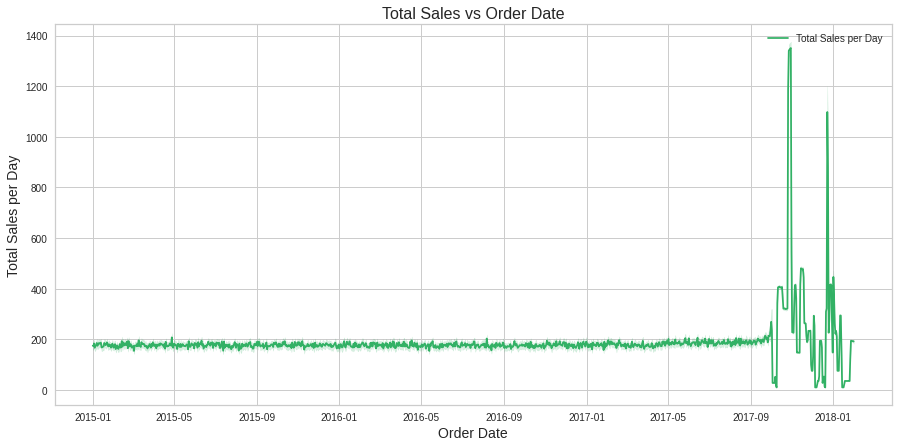

In [0]:
figure = plt.figure(figsize = [15, 7])
sns.lineplot(x = 'order date (DateOrders)', y = 'Sales per customer', data = data, color = '#32B165')

plt.xlabel('Order Date', size = 14)
plt.ylabel('Total Sales per Day', size = 14)
plt.legend(labels = ['Total Sales per Day'], loc = 'upper right', frameon = False)
plt.title('Total Sales vs Order Date', size = 16)
plt.show()

**Observation:**

- **Most of the sales happened around the month of Oct-Dec,2017**.

**<h4>Question 6: Which state has placed highest number of orders?</h4>**

Total States are:  44


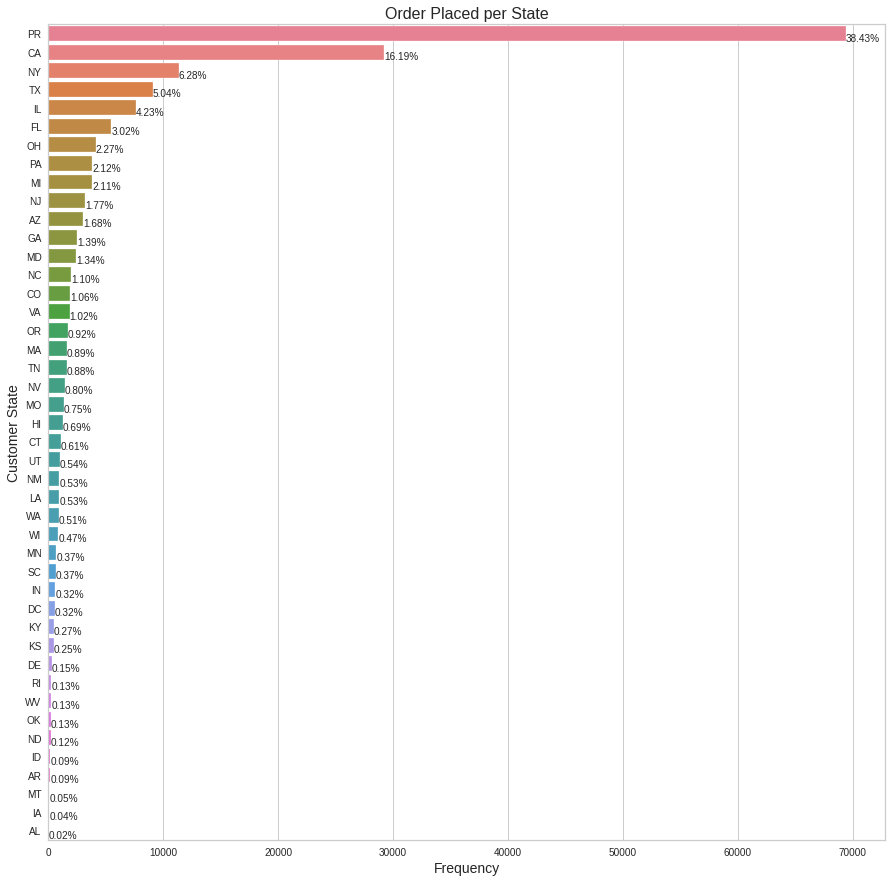

In [0]:
print('Total States are: ', len(data['Customer State'].value_counts().index))
figure = plt.figure(figsize = [15, 15])
ax = sns.barplot(data['Customer State'].value_counts(), data['Customer State'].value_counts().index, 
                 palette  = sns.color_palette("husl", len(data['Customer State'].unique())))
total = len(data['Customer State'])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

plt.xlabel('Frequency', size = 14)
plt.ylabel('Customer State', size = 14)
plt.title('Order Placed per State', size = 16)
plt.show()

**Observation:**

- **Puerto Ricans** state **had high number of order placement** around **38%**, more than any other state.

**<h4>Question 7: What amount of benifit was obtained per state?</h4>**

Total States are:  44


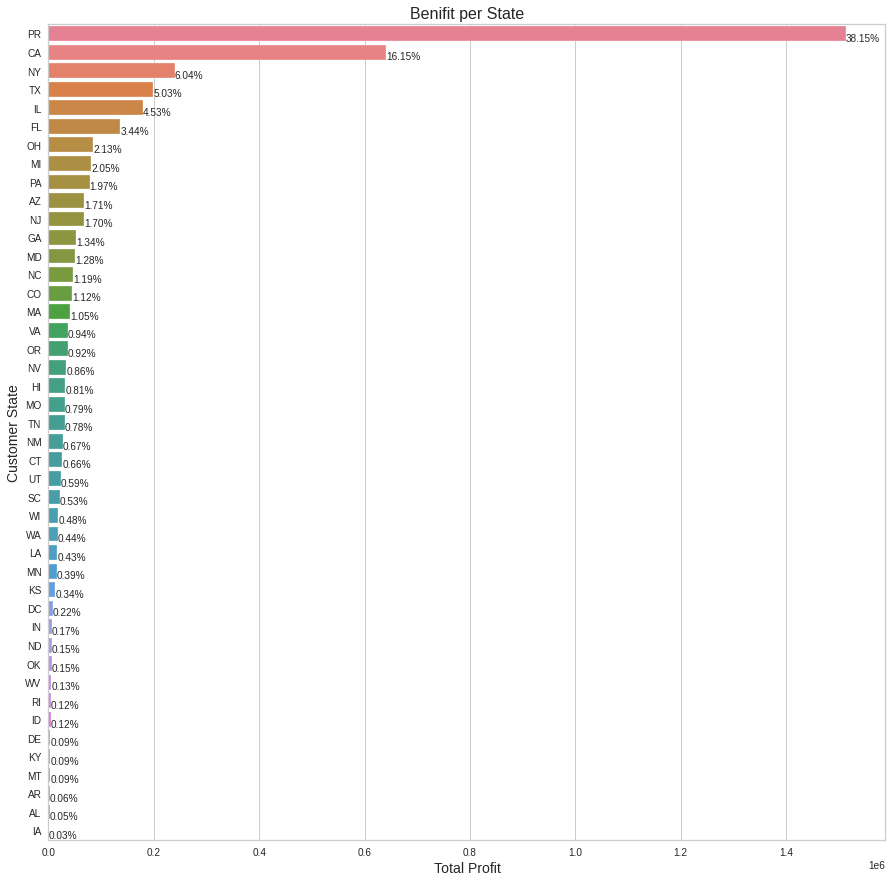

In [0]:
print('Total States are: ', len(data['Customer State'].value_counts().index))

avg_benifit_data = data.groupby(by = ['Customer State'], as_index = False).agg('sum').sort_values(by = 'Benefit per order', ascending = False)

figure = plt.figure(figsize = [15, 15])

ax = sns.barplot(x = avg_benifit_data['Benefit per order'], y = avg_benifit_data['Customer State'], 
                 palette  = sns.color_palette("husl", len(avg_benifit_data['Customer State'].unique())))

total = avg_benifit_data['Benefit per order'].sum()
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

plt.xlabel('Total Profit', size = 14)
plt.ylabel('Customer State', size = 14)
plt.title('Benifit per State', size = 16)
plt.show()

**Observation:**

- As we saw earlier **order placement of Puerto Ricans was very high**, so it is **obivious** that the **profit will be high**.
- We can see that **profit obtained by Puerto Ricans** was around **38%** i.e. **$\$$1,513,216 dollars**.

**<h4>Question 8: What was the total amount of products under each category that was ordered and at what value it was sold?</h4>**

- As there are 50 categories and each category may contain more products, firstly we shall see all categories in one go and then we shall divide this into two visualizations for better clairty.

In [0]:
cat_name_frame = data.groupby(by = 'Category Name', as_index = False).agg('sum').sort_values(by = 'Order Item Product Price', ascending = False)

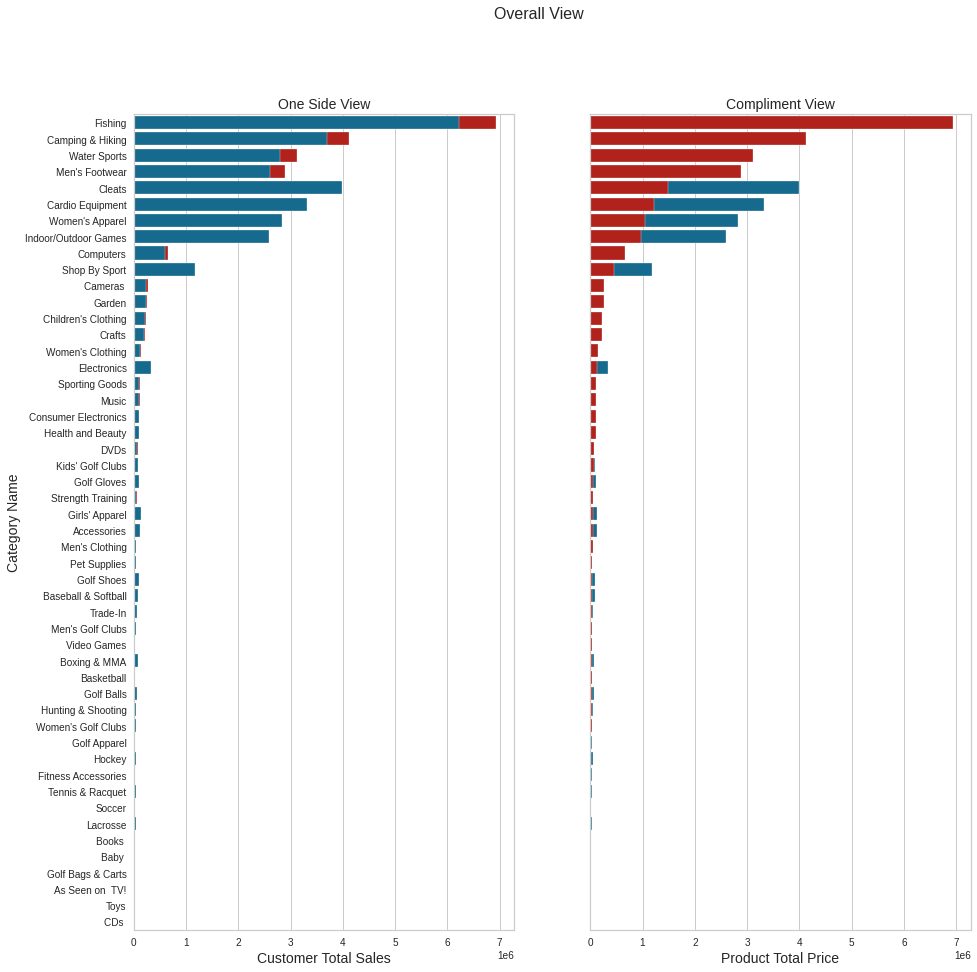

In [0]:
figure = plt.figure(figsize = [15, 15])

plt.subplot(1, 2, 1)
ax1 = sns.barplot(x = 'Order Item Product Price', y = 'Category Name', color = "r", data = cat_name_frame, ci = None)
ax2 = sns.barplot(x = 'Sales per customer', y = 'Category Name', color = "b", data = cat_name_frame, ci = None)
ax2.set_xlabel(xlabel = 'Customer Total Sales', size = 14)
ax2.set_ylabel(ylabel = 'Category Name', size = 14)
ax2.set_title(label = 'One Side View', size = 14)


plt.subplot(1, 2, 2)
ax3 = sns.barplot(x = 'Sales per customer', y = 'Category Name', color = "b", data = cat_name_frame, ci = None)
ax4 = sns.barplot(x = 'Order Item Product Price', y = 'Category Name', color = "r", data = cat_name_frame, ci = None)
ax4.set_xlabel(xlabel = 'Product Total Price', size = 14)
ax4.set_ylabel(ylabel = '')
ax4.set_yticks(ticks = [])
ax4.set_title('Compliment View', size = 14)

plt.suptitle(t = 'Overall View', size = 16)
plt.show()

**First 25 Categories**

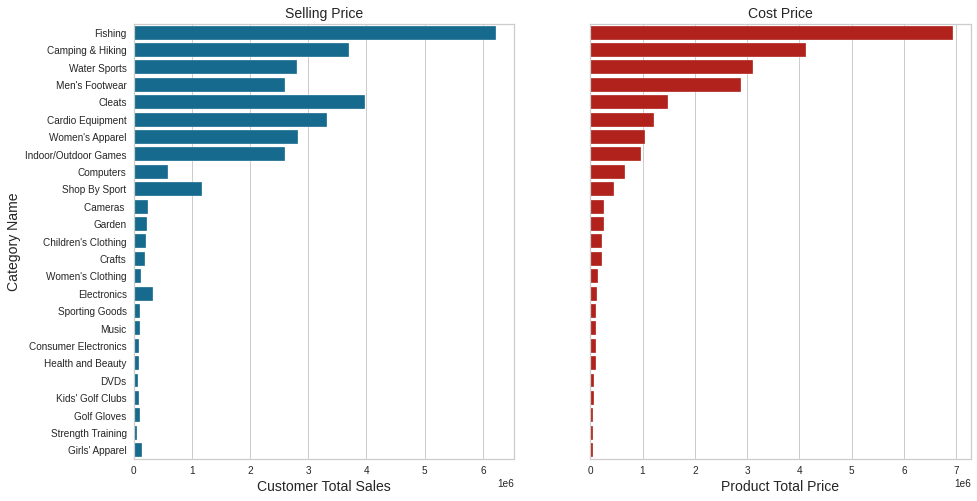

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 8])
ax1 = sns.barplot(x = 'Sales per customer', y = 'Category Name', color = "b", data = cat_name_frame.iloc[0:25,:], ci = None, ax = ax1)
ax1.set_xlabel(xlabel = 'Customer Total Sales', size = 14)
ax1.set_ylabel(ylabel = 'Category Name', size = 14)
ax1.set_title(label = 'Selling Price', size = 14)

ax2 = sns.barplot(x = 'Order Item Product Price', y = 'Category Name', color = "r", data = cat_name_frame.iloc[0:25,:], ci = None, ax = ax2)
ax2.set_xlabel(xlabel = 'Product Total Price', size = 14)
ax2.set_title(label = 'Cost Price', size = 14)
ax2.set_ylabel(ylabel = '')
ax2.set_yticks(ticks = [])
plt.show()

**Last 25 Categories**

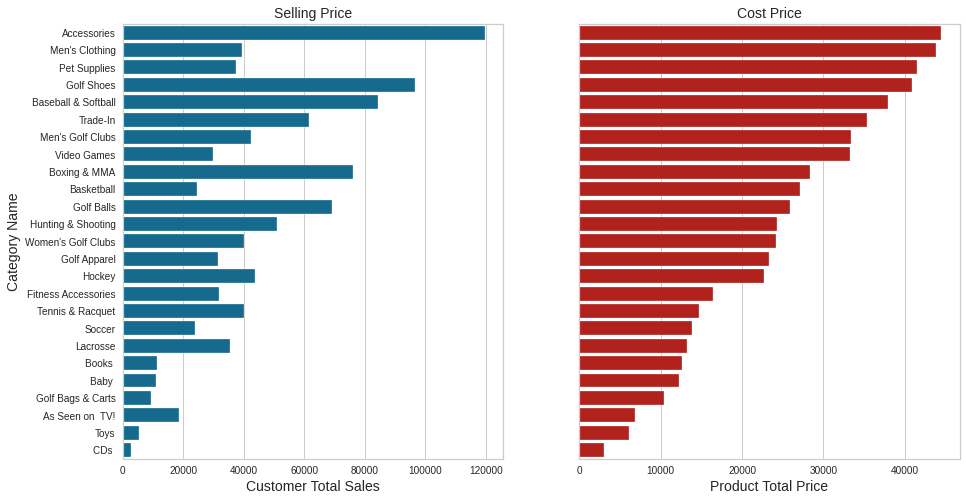

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 8])
ax1 = sns.barplot(x = 'Sales per customer', y = 'Category Name', color = "b", data = cat_name_frame.iloc[25:50,:], ci = None, ax = ax1)
ax1.set_xlabel(xlabel = 'Customer Total Sales', size = 14)
ax1.set_ylabel(ylabel = 'Category Name', size = 14)
ax1.set_title(label = 'Selling Price', size = 14)

ax2 = sns.barplot(x = 'Order Item Product Price', y = 'Category Name', color = "r", data = cat_name_frame.iloc[25:50,:], ci = None, ax = ax2)
ax2.set_xlabel(xlabel = 'Product Total Price', size = 14)
ax2.set_title(label = 'Cost Price', size = 14)
ax2.set_ylabel(ylabel = '')
ax2.set_yticks(ticks = [])
plt.show()

**Observation:**

- We can see that **some of the product** were **sold at profit** and while **some** were **at loss**.
- **For example** you can see in **first 25 categories**, **under fishing, Product total price is more than the customer total sales**.
- It means **retail business** is **facing loss** under **fishing category**.

**Note:** These are few question, from here if you would like to explore further, you are most welcome.

<a id = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---

- In this part we will **perform encoding over categorical features** and **feed it** to the **Random Forest** because machines can't understand human language.
- But before that we **need** to **drop certain features** like,
  - Customer Fname, Customer Lname, Customer Street, Order City, Order State, Product Image, order date (DateOrders), shipping date (DateOrders).
- We **dropped** these features **because** these **have labels with high cardinality**.
- **Random Forest** will then **identify important features** for our model **using threshold** over the information gain over reduction in impurity.
- And **finally** we will **split** our **data** for the **model development**.

In [19]:
drop_labels = ['Customer Fname', 'Customer Lname', 'Customer Street', 'Order City', 'Order State', 'Product Image', 'order date (DateOrders)', 'shipping date (DateOrders)']
data.drop(labels = drop_labels, axis = 1, inplace = True)
print('Data Shape:',data.shape)

Data Shape: (180508, 29)


<a id = Section71></a>
### **7.1 Encoding Categorical Features**

- In this part we will **analyze** the **number of labels per feature** and **use Target Encoding**.
- **Reason to use Target encoding:** There are **some features** which are **highly cardinal** in nature.

**Target Encoding:** It is useful when you want to transform catgories based on the probability with respect to target. It has a limitation that they are not generated for the test data. We usually save the target encodings obtained from the training data set and use the same encodings to encode features in the test data set. It can be applied in following cases:
- **For the case of categorical target:**
    - Features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data.

- **For the case of continuous target:** 
    - Features are replaced with a blend of the expected value of the target given particular categorical value and the expected value of the target over all the training data. Example:

<center><img src = "https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Retail/Images/Target%20Encoding.png"></center>

For example, We want to encode Punjab label, we will perform following:
- Estimate all Punjab Labels in data, here it is 3,
- Take mean of target feature with respect to Punjab labels,
- Replace this value with the label in data as shown in figure above.

**Further Reference:** A complete thesis on how target encoders are helpful can be found under provided <a href = "https://dl.acm.org/doi/10.1145/507533.507538">**link**</a>. You can download pdf present there.

In [20]:
cat_features = []
label_len = []

# Identify Categorical Features
for i in data.columns:
  if (data[i].dtype == object):
    cat_features.append(i)

# Identify Labels Length per Feature
for i in cat_features:
  label_len.append(len(data[i].unique()))

print('Total Categorical Features:', len(cat_features))

# Categorical Feature Frame Representation
cat_frame = pd.DataFrame(data = {'Length': label_len}, index = cat_features)
cat_frame.transpose()

Total Categorical Features: 14


,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order Country,Order Region,Order Status,Product Name,Shipping Mode
Length,4,4,50,562,2,3,44,11,5,164,23,9,118,4


**Splitting Categorical & Numerical Features**

In [21]:
# Frame Containing Categorical Features
cat_data = data[cat_features]
print('Cat Data Shape:', cat_data.shape)

# Frame Containing Numerical Features
num_data = data.drop(labels = cat_features, axis = 1)
print('Num Data Shape:', num_data.shape)

Cat Data Shape: (180508, 14)
Num Data Shape: (180508, 15)


In [0]:
cat_data.head(1)

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order Country,Order Region,Order Status,Product Name,Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Indonesia,Southeast Asia,COMPLETE,Smart watch,Standard Class


In [0]:
num_data.head(1)

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Customer Zipcode,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Product Status
0,3,4,91.25,314.640015,0,725,18.251453,-66.037056,13.11,0.04,327.75,0.29,1,327.75,0


**Performing Target Encoding**

In [22]:
te = TargetEncoder(cols = cat_features)
cat_data = te.fit_transform(X = data[cat_features], y = data['Benefit per order'])
print('Cat Data Shape:', cat_data.shape)
cat_data.head(2)

Cat Data Shape: (180508, 14)


,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order Country,Order Region,Order Status,Product Name,Shipping Mode
0,22.081986,22.478028,35.066135,21.722176,21.813381,22.173062,21.813381,18.772917,20.785229,21.563065,22.153192,22.210404,35.066135,21.993403
1,21.867054,21.618133,35.066135,21.722176,21.813381,22.173062,21.813381,18.772917,20.785229,20.855661,21.434521,21.529887,35.066135,21.993403


**Concatenating Numerical & Categorical Features**

In [23]:
new_data = pd.concat(objs = [num_data, cat_data], axis = 1, verify_integrity = True)
print('New Data Shape:', new_data.shape)
new_data.head(1)

New Data Shape: (180508, 29)


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Customer Zipcode,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Product Status,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order Country,Order Region,Order Status,Product Name,Shipping Mode
0,3,4,91.25,314.640015,0,725,18.251453,-66.037056,13.11,0.04,327.75,0.29,1,327.75,0,22.081986,22.478028,35.066135,21.722176,21.813381,22.173062,21.813381,18.772917,20.785229,21.563065,22.153192,22.210404,35.066135,21.993403


<a id = Section72></a>
### **7.2 Feature Selection using Random Forest**

- Now in **real world**, it is very **rare** that **all** the **features** are **important** while developing the model. 
- So **instead** we **analyze** the **impact** of **input over the target**, either done by performing **statistical** **tests**(Pearson, ANOVA, Chi-Square) or by using **Random Forest**.
- **Random forests** are one the most **popular machine learning algorithms** because they **provide**:
 - **a good predictive performance**,
 - **low overfitting and**
 - **easy interpretability.** 
- This **interpretability** is **derived** from the **importance of each feature** on the tree decision **evaluated** on the **reduction** in **impurity**. 
- In other words, it is **easy to compute** how much **each feature is contributing** to the **decision**.
- **Below** we have **implemented** a function namely, **SelectFromModel** **available** in **Sklearn** which **uses** the **base estimator** to **identify** **important features**.
- The **importance** of feature is **determined** on the **basis** of **threshold**(a measure to calculate feature importance).

In [0]:
X = new_data.drop('Benefit per order', axis = 1)
y = new_data['Benefit per order']

In [0]:
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 2
Threshold set by Model: 0.04
Features: ['Sales per customer', 'Order Item Profit Ratio']


Below features are plotted against their relative importance (in %age),  of each feature.

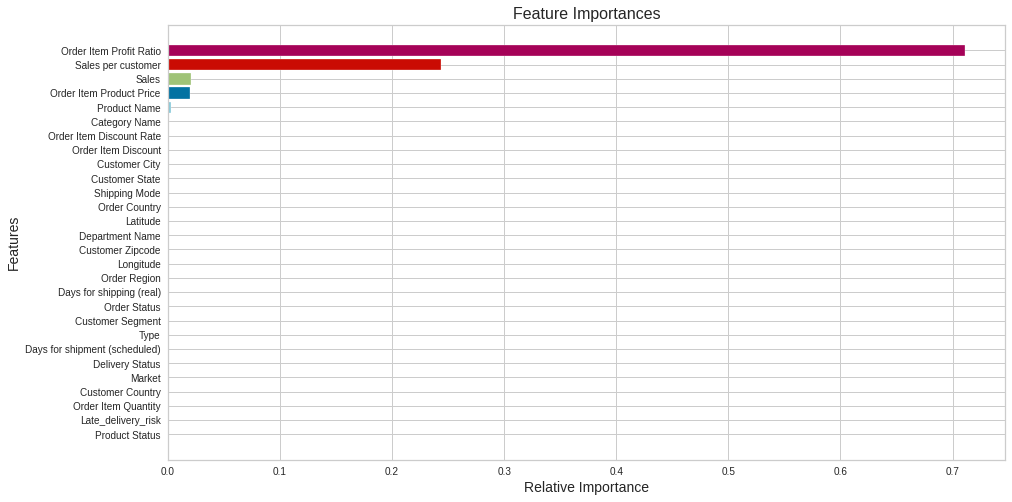

In [0]:
# Have some patience, may take some time :)
figure = plt.figure(figsize = [15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

<a id = Section73></a>
### **7.3 Data Preparation**

- In the **following section** we will **make a cut** over **Target Feature** i.e Benifit per order **by using** a **categorical feature**.
- We will **create a new categorical feature** that will **benifit us** in **splitting** the **data** in **more controlled way** by using **stratified split**.

In [0]:
new_data['Benifit_Cat'] = pd.cut(x = new_data['Benefit per order'], bins = [np.NINF, 0, 225, np.inf ], labels = [1, 2, 3])

In [26]:
train_data, test_data = train_test_split(new_data, test_size = 0.2, random_state = 42, stratify = new_data['Benifit_Cat'])

print('Train Data Shape:', train_data.shape)
print('Test Data Shape:', test_data.shape)

Train Data Shape: (144406, 30)
Test Data Shape: (36102, 30)


Now that we have split out our data we can remove feature Benifit_Cat from our data set and move further.

In [0]:
train_data.drop(labels = ['Benifit_Cat'], axis = 1, inplace = True)
test_data.drop(labels = ['Benifit_Cat'], axis = 1, inplace = True)

In [28]:
X_train, y_train = train_data.drop(labels = ['Benefit per order'], axis = 1), train_data['Benefit per order']
X_test, y_test = test_data.drop(labels = ['Benefit per order'], axis = 1), test_data['Benefit per order']

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (144406, 28) (144406,)
Testing Data Shape: (36102, 28) (36102,)


<a id = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop two type of models**, 
  - one **using all features** and 
  - second **using only importatnt feature** marked important by Random Forest.
- Then we will **compare the results** obtained from them and make our observation.
- For **evaluation purpose** we have **made a custom function** which will help us in **analyzing the distribution of acutal and predicted values**.
- **At the end** we will **tune** our **models if required**.

For the **ideal performance** of the **model** a **reference plot** has been **below**:

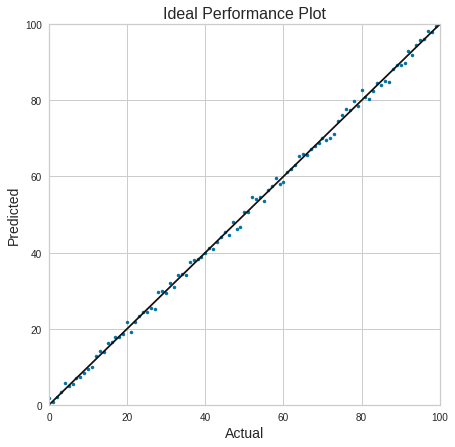

In [0]:
# Generating 100 values with 
x = np.linspace(start = 0, stop = 100, num = 101) 
y = np.random.normal(x)

plt.figure(figsize = [7, 7])
plt.plot(x, y, 'b.')
plt.plot(x, x, 'k-') 
plt.xlabel(xlabel = 'Actual', size = 14)
plt.ylabel(ylabel = 'Predicted', size = 14)
plt.title(label = 'Ideal Performance Plot', size = 16)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [0]:
def PlotScore(y_train, y_train_pred, y_test, y_test_pred):
  '''
  Plot visual of acutal and predicted for train & test data
  y_train: actual values of y train
  y_train_pred: predicted values of y_train
  y_test: actual values of y_test
  y_test_pred: predicted values of y_test
  '''
  plt.figure(figsize = [13.66, 6])
  plt.subplot(1, 2, 1)
  sns.lineplot(x = y_train, y = y_train_pred, marker = 'o')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('For Train Data')

  plt.subplot(1, 2, 2)
  sns.lineplot(x = y_test, y = y_test_pred, marker = 'o')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('For Test Data')
  plt.show()

<a id = Section81></a>
## **8.1 Baseline Models**

- **In this section we will develop modes using all the features and analyze the result obtained from it.**

<a id = Section811></a>
### **8.1.1 Linear Regression**


Acutal Values: [ 53.29999924  79.93000031 -53.54999924  91.33999634  50.49000168]
Predicted Values: [ 57.51313126  83.82646815 -45.0723244   74.41091282  57.30166264]
RMSE (Train Data): 56.5
RMSE (Test Data): 61.32
R-Squared (Train Data): 71.0 %
R-Squared (Test Data): 66.0 %


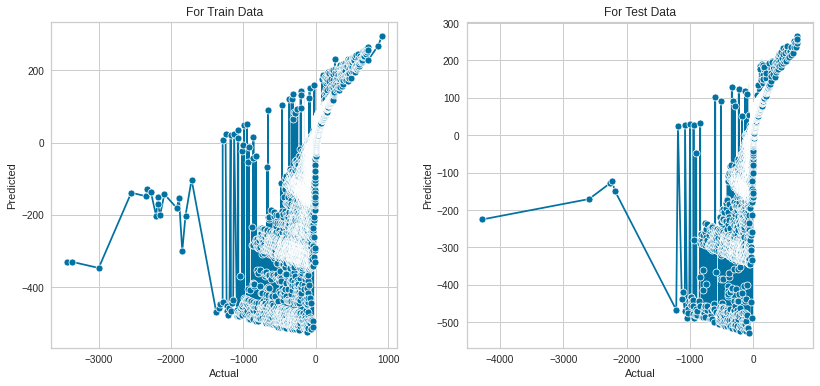

In [0]:
# Have some patience, may take some time :)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('Acutal Values:', y_test[0:5].values)
print('Predicted Values:', y_test_pred[0:5])

# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_train_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))

# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(lr.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(lr.score(X_test, y_test), decimals = 2)*100, '%')

# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observation:**

- **RMSE obtained** both on **train data** is **56.5** while on **test it is ~61**.
- **R-Square** is good on **train data** i.e. **71%** while on **test data is 66%**.
- It clearly define that **model** is **overfitting**.

### **8.1.2 Decision Tree Regressor**

Acutal Values: [ 53.29999924  79.93000031 -53.54999924  91.33999634  50.49000168]
Predicted Values: [ 54.04000092  79.93000031 -53.54999924  91.33999634  50.79000092]
RMSE (Train Data): 0.0
RMSE (Test Data): 9.63
R-Squared (Train Data): 100.0 %
R-Squared (Test Data): 99.0 %


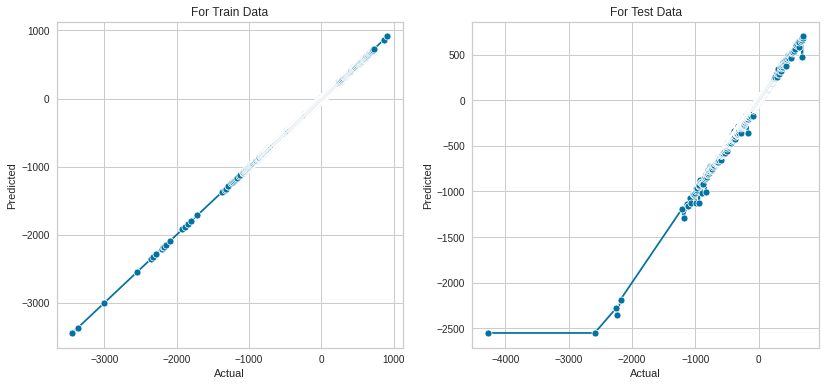

In [0]:
# Have some patience, may take some time :)
dtc = DecisionTreeRegressor(random_state = 42)
dtc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

print('Acutal Values:', y_test[0:5].values)
print('Predicted Values:', y_test_pred[0:5])

# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_train_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))

# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(dtc.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(dtc.score(X_test, y_test), decimals = 2)*100, '%')

# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observation:**


- **RMSE** on **training data** is **0** and **testing data is ~9.6** which is **low** as **compared to Linear Regression**.
- **R-Squared** is also **better 100% on training data while 99% on test data**.
- We can see **better results** but **model** is **overfitting**.

### **8.1.3 Random Forest Regressor**

Acutal Values: [ 53.29999924  79.93000031 -53.54999924  91.33999634  50.49000168]
Predicted Values: [ 53.7014996   79.93000031 -53.65669964  91.33999634  50.65570111]
RMSE (Train Data): 1.61
RMSE (Test Data): 10.49
R-Squared (Train Data): 100.0 %
R-Squared (Test Data): 99.0 %


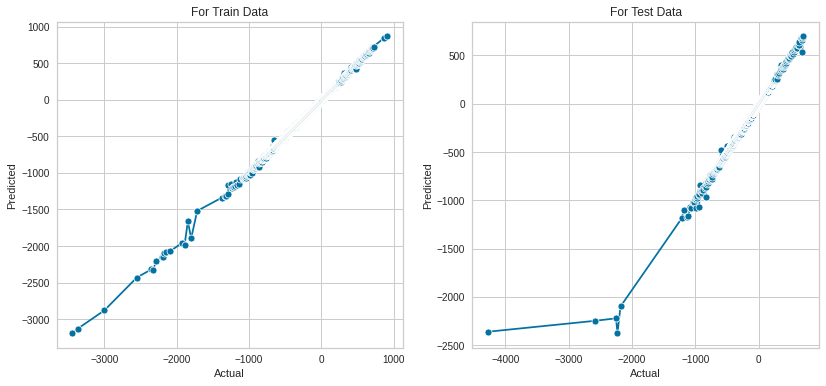

In [0]:
# Have some patience, may take some time :)
random_forest = RandomForestRegressor(random_state = 42)
random_forest.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

print('Acutal Values:', y_test[0:5].values)
print('Predicted Values:', y_test_pred[0:5])

# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_train_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))

# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(random_forest.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(random_forest.score(X_test, y_test), decimals = 2)*100, '%')

# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observation:**

- We **didn't obtained any better results than Decision Tree**.
- **Infact it performed worse** than Decision Tree Regressor.
- **RMSE obtained** on **training data is 1.61** and **testing data is ~10.5** which is **more than previous model**.
- There is **no change in obtaining R-Squared** from previous model.
- This **model** **overfits** the data.

<a id = Section82></a>
## **8.2 Essential Features Models**

- In this section **we will be using only important features** that were **marked important by Random Forest**.
- The **important features** we obtained from Random Forest **were Sales per customer and Order Item Profit Ratio**.

In [0]:
train_data = train_data[['Sales per customer', 'Order Item Profit Ratio', 'Benefit per order']]
test_data = test_data[['Sales per customer', 'Order Item Profit Ratio', 'Benefit per order']]

In [30]:
X_train, y_train = train_data.drop(labels = ['Benefit per order'], axis = 1), train_data['Benefit per order']
X_test, y_test = test_data.drop(labels = ['Benefit per order'], axis = 1), test_data['Benefit per order']

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (144406, 2) (144406,)
Testing Data Shape: (36102, 2) (36102,)


### **8.2.1 Linear Regression**

Acutal Values: [ 53.29999924  79.93000031 -53.54999924  91.33999634  50.49000168]
Predicted Values: [ 58.27743606  84.84198517 -39.32377593  73.90279937  58.32328216]
RMSE (Train Data): 56.53
RMSE (Test Data): 61.36
R-Squared (Train Data): 70.0 %
R-Squared (Test Data): 66.0 %


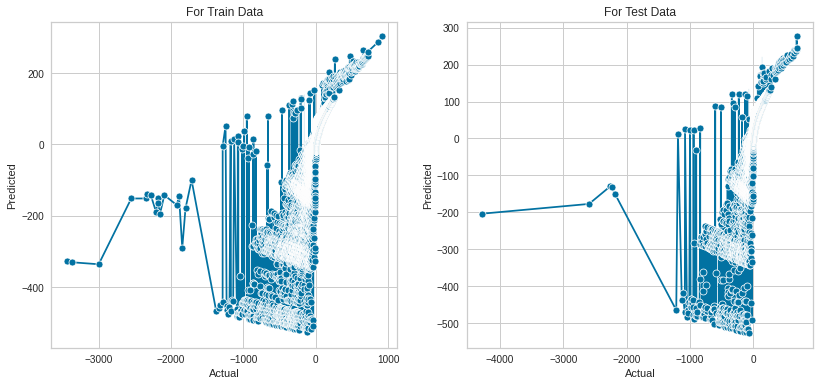

In [0]:
# Have some patience, may take some time :)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('Acutal Values:', y_test[0:5].values)
print('Predicted Values:', y_test_pred[0:5])

# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_train_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))

# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(lr.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(lr.score(X_test, y_test), decimals = 2)*100, '%')

# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observation:**

- We can see that **there isn't any major difference after using only important features**.
- **RMSE obtained** on both **training data and testing data have reduce i.e.  56 and ~61**.
- **R-Squared obtained** on **training data is 70%** while on **testing data it is 66%**
- The **model** still **overfits**.

### **8.2.2 Decision Tree Regressor**

Acutal Values: [ 53.29999924  79.93000031 -53.54999924  91.33999634  50.49000168]
Predicted Values: [ 53.42299919  79.93000031 -53.54999924  91.33999634  50.56500149]
RMSE (Train Data): 0.2
RMSE (Test Data): 9.27
R-Squared (Train Data): 100.0 %
R-Squared (Test Data): 99.0 %


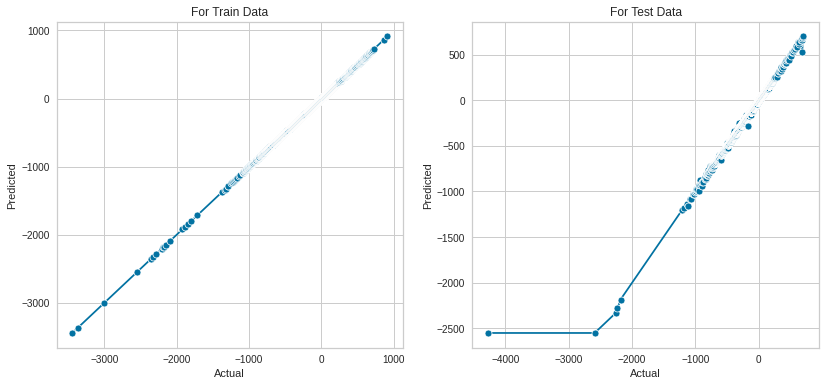

In [0]:
# Have some patience, may take some time :)
dtc = DecisionTreeRegressor(random_state = 42)
dtc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

print('Acutal Values:', y_test[0:5].values)
print('Predicted Values:', y_test_pred[0:5])

# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_train_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))

# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(dtc.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(dtc.score(X_test, y_test), decimals = 2)*100, '%')

# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observation:**

- **RMSE obtained** on both **training and testing data is 0.2 and 9.27** which is **better than previous model** and **its predecessor**.
- **R-Squared is same** as it's predecessor which is 100% on training and 99% on testing data.
- However there could be chance of **overfitting**.

### **8.2.3 Random Forest Regressor**

Acutal Values: [ 53.29999924  79.93000031 -53.54999924  91.33999634  50.49000168]
Predicted Values: [ 53.40102837  79.93000031 -53.54979927  91.33999634  50.56842371]
RMSE (Train Data): 1.13
RMSE (Test Data): 8.5
R-Squared (Train Data): 100.0 %
R-Squared (Test Data): 99.0 %


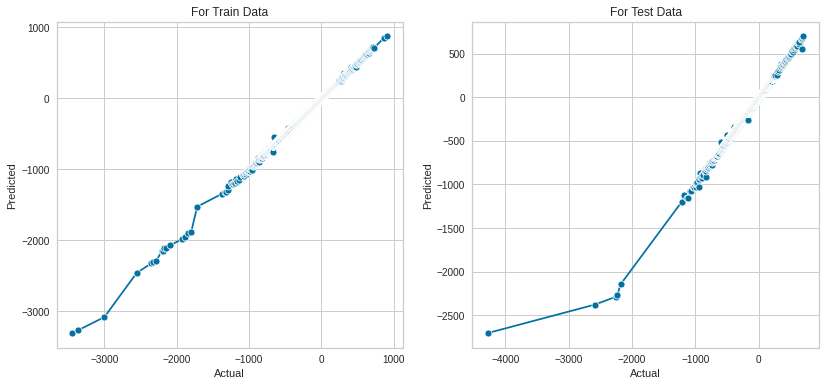

In [0]:
# Have some patience, may take some time :)
random_forest = RandomForestRegressor(random_state = 42)
random_forest.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

print('Acutal Values:', y_test[0:5].values)
print('Predicted Values:', y_test_pred[0:5])

# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_train_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))

# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(random_forest.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(random_forest.score(X_test, y_test), decimals = 2)*100, '%')

# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observation:**

- **RMSE obtained** on both **training data** and **testing data is 1.13 and 8.5** which is **lower than previous models**.
- **R-Squared** obtained is **same as the Decision Tree**.
- **But wait, we can still see some overfitting**
- **To ensure** that we **will use** a **cross validation** strategy over this model.


<a id = Section83></a>
## **8.3 Model Evaluation Using K-Fold Cross Validation**

- In this section we will use **K-Fold Cross Validation** over data **ensuring** that **there is no overfitting** over the models.
- Here **K-Fold** we will use is **10** **because** as already **data** is **large** enough.
- Here we will be **taking** a **help** of **custom function** which will **return RMSE scores, mean RMSE score and standard deviation**.

In [0]:
def display_scores(scores):
  print('Scores:', scores)
  print('Mean:', scores.mean())
  print('Standard Deviation:', scores.std())

### **8.3.1 Linear Regression**

In [0]:
scores = cross_val_score(estimator = lr, X = X_train, y = y_train, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
linear_scores = np.sqrt(-scores)
display_scores(linear_scores)

Scores: [62.07141074 57.25842838 53.56090599 56.28301184 49.13257061 59.5454769
 52.44481062 55.36258393 64.80657547 53.20810961]
Mean: 56.367388409041396
Standard Deviation: 4.486126282147346


**Observation:**

- Well we **got same result** as that of single execution of Linear Regression.
- Mean **RMSE obtained on training data is 56.3**.
- It shows that our **model** indeed **was overfitting** over train data.

### **8.3.2 Decision Tree Regressor**

In [0]:
scores = cross_val_score(estimator = dtc, X = X_train, y = y_train, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
tree_scores = np.sqrt(-scores)
display_scores(tree_scores)

Scores: [4.08737767 4.20146964 3.06615334 3.96347125 2.07013385 2.34977292
 2.03799991 2.7901073  3.61862517 1.70509817]
Mean: 2.98902092133861
Standard Deviation: 0.8873432522237138


**Observation:**

- We **again saw some better results**.
- The mean **RMSE obtained** on train from the cross validation i.e. **2.9**.
- It **shows** that **Decision Tree was overfitting** the data.

### **8.3.3 Random Forest Regressor**

In [0]:
scores = cross_val_score(estimator = random_forest, X = X_train, y = y_train, scoring = 'neg_mean_squared_error', cv = 10, n_jobs = -1)
forest_scores = np.sqrt(-scores)
display_scores(forest_scores)

Scores: [3.34504951 4.90217385 2.70511547 2.76837645 2.03179827 3.04896783
 1.10375231 2.37246523 3.44898243 1.33303695]
Mean: 2.705971830250035
Standard Deviation: 1.0451374990176676


**Observation:**

- We **got** some **great result again**. Our **RMSE** obtained is **2.7** which is **better** than any other model.
- Our **end goal** should be **generalizing** the **results** both on **train data** as well as on **test data**.
- But we **obtained** this **low RMSE because**, the **data** was **trained multiple times** in **stratified fashion**.
- In **next section** we will **find the parameters** to **tune our model** which will result in low bias and variance i.e. overfitting.

<a id = Section84></a>
## **8.4 Fine Tuning of Model**

- **Tuning** the model **takes** **extensive work**, so we will be **working** out **with few parameters instead** of **large combinations**.
- Now that we know that **Random Forest performed better** than **Linear Regression** and **Decision Tree Regressor**, we will **focus on fine tuning** of the model for Random Forest.
- For that we will **implement Grid Search CV** to **find optimal setting** for the model.

In [0]:
parameter_grid = [{'n_estimators' : [10, 15, 20, 25], 'bootstrap' : [True, False], 'max_depth' : [20, 25, 26, 27, 28, 29, 30], 'oob_score': [True, False]}]

In [32]:
# Have some patience, may take some time :)
rand_forest = RandomForestRegressor(random_state = 42, n_jobs = -1)
random_search = GridSearchCV(estimator = rand_forest, param_grid = parameter_grid, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = 10, return_train_score = True)
random_search.fit(X_train, y_train)
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [33]:
random_search.best_params_

{'bootstrap': False, 'max_depth': 20, 'n_estimators': 20, 'oob_score': False}

- For complete summary of results you can execute following code:
  - pd.DataFrame(random_search.cv_results_)

<a id = Section85></a>
## **8.5 Final Model**

- Indeed the result from previous model is not better because we have hardware limitation to process large number of combinations.

Acutal Values: [ 53.29999924  79.93000031 -53.54999924  91.33999634  50.49000168]
Predicted Values: [ 53.42299919  79.93000031 -53.54999924  91.33999634  50.56500149]
RMSE (Train Data): 0.2
RMSE (Test Data): 9.3
R-Squared (Train Data): 100.0 %
R-Squared (Test Data): 99.0 %


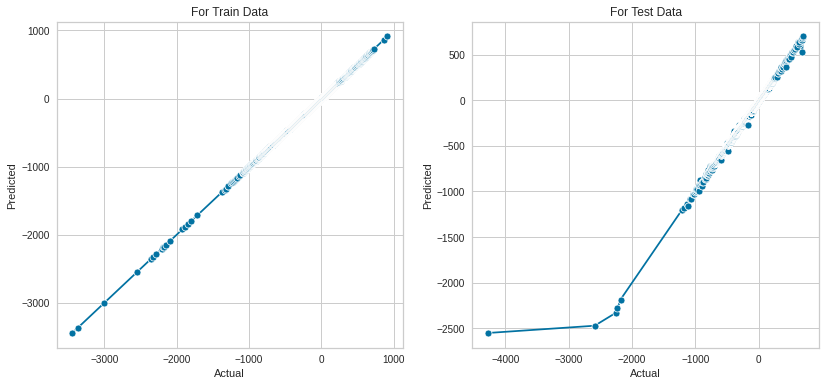

In [36]:
# Have some patience, may take some time :)
random_forest = random_search.best_estimator_
random_forest.fit(X_train, y_train)

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

print('Acutal Values:', y_test[0:5].values)
print('Predicted Values:', y_test_pred[0:5])

# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_train, y_pred = y_train_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))

# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(random_forest.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(random_forest.score(X_test, y_test), decimals = 2)*100, '%')

# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observation:**

- You can see that the **RMSE has increased a little bit** for testing data i.e **9.3**.
- But **that's okay** because we have **choosed** only **limited number of combinations** due to hardware limitaitons.
- Generally, in **real life a script** is **prepared** for **heavy tuning** of the model.
- This **tuning takes several hours** under **high end performance systems**.

<a id = Section9></a>

---
# **9. Conclusion**
---

- We **studied in depth about the data**, its **characteristics** and its **distribution**.
- We **explored various questions** regarding the supply chain, profit obtained by each state etc.
- We **handled high dimensional data** in **manual way** so that **later down** it was easy to **identify important features**.
- We **investigated in depth about the features** which to **retain**(Sales per customer, Order Item Profit Ratio) and which to **discard**.
- Indeed we **peformed feature selection using Random Forest** because it is fast, accurate and reliable.
- We **made two different types of model** i.e. 
  - one **using all features**, 
  - two **using important features** 
  
- We came to **conclusion** that there was **very little impact after discarding** the **un-important features**.
- At **final stage Random Forest outperformed all the models** because of **low error**.
- We **performed cross validation** to **ensure whether our model was overfitting or not**.
- Then **after tuning with some combinations we finalized Random Forest**.